<a href="https://colab.research.google.com/github/SergioDLezama/Lung-Cancer-Prediction-ML/blob/testing/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To split the data into train and test
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/Lung-Cancer-Prediction-ML/lungcancerdataset.csv')

In [ ]:
data = df.copy()

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,3000.0,55.169000,14.723746,30.0,42.0,55.0,68.0,80.0
SMOKING,3000.0,1.491000,0.500002,1.0,1.0,1.0,2.0,2.0
YELLOW_FINGERS,3000.0,1.514000,0.499887,1.0,1.0,2.0,2.0,2.0
ANXIETY,3000.0,1.494000,0.500047,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,3000.0,1.499000,0.500082,1.0,1.0,1.0,2.0,2.0
CHRONIC_DISEASE,3000.0,1.509667,0.499990,1.0,1.0,2.0,2.0,2.0
FATIGUE,3000.0,1.489667,0.499977,1.0,1.0,1.0,2.0,2.0
ALLERGY,3000.0,1.506667,0.500039,1.0,1.0,2.0,2.0,2.0
WHEEZING,3000.0,1.497333,0.500076,1.0,1.0,1.0,2.0,2.0
ALCOHOL_CONSUMING,3000.0,1.491333,0.500008,1.0,1.0,1.0,2.0,2.0


In [ ]:
df.duplicated().sum()

2

In [ ]:
print('Before dropping',df.shape[0])
df = df.drop_duplicates()
print('Before dropping',df.shape[0])

Before dropping 3000
Before dropping 2998


In [ ]:
cols_to_mod = df.columns[df.dtypes == 'int64']
cols_to_mod = cols_to_mod.drop('AGE')

for col in cols_to_mod:
    df[col] = df[col].map({1:0,2:1})
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,0,0,0,1,1,0,1,1,1,1,1,1,0,NO
1,F,55,0,1,1,0,0,1,1,1,0,0,0,1,1,NO
2,F,78,1,1,0,0,0,1,0,1,0,0,1,0,0,YES
3,M,60,1,0,0,0,1,0,1,0,0,1,0,1,1,YES
4,F,80,0,0,1,0,0,1,0,1,0,0,0,0,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,71,1,0,0,1,1,0,0,0,0,1,0,0,1,NO
2996,F,75,0,1,0,0,0,1,1,1,1,0,0,1,0,NO
2997,F,62,1,1,1,0,1,1,1,1,0,0,1,1,1,YES
2998,M,30,0,0,1,1,1,1,1,1,1,0,1,0,1,YES


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,2998.0,55.171448,14.728302,30.0,42.0,55.0,68.0,80.0
SMOKING,2998.0,0.491328,0.500008,0.0,0.0,0.0,1.0,1.0
YELLOW_FINGERS,2998.0,0.514009,0.499887,0.0,0.0,1.0,1.0,1.0
ANXIETY,2998.0,0.493996,0.500047,0.0,0.0,0.0,1.0,1.0
PEER_PRESSURE,2998.0,0.498666,0.500082,0.0,0.0,0.0,1.0,1.0
CHRONIC_DISEASE,2998.0,0.509673,0.499990,0.0,0.0,1.0,1.0,1.0
FATIGUE,2998.0,0.489660,0.499976,0.0,0.0,0.0,1.0,1.0
ALLERGY,2998.0,0.507005,0.500034,0.0,0.0,1.0,1.0,1.0
WHEEZING,2998.0,0.497332,0.500076,0.0,0.0,0.0,1.0,1.0
ALCOHOL_CONSUMING,2998.0,0.491328,0.500008,0.0,0.0,0.0,1.0,1.0


In [ ]:
num_cols = df.select_dtypes(include='int64').columns.tolist()
for i in df[num_cols]:
  print('*'*25)
  print(df[i].value_counts(normalize=True))

*************************
AGE
54    0.024350
75    0.023682
67    0.023682
47    0.023349
69    0.023349
78    0.023015
55    0.023015
79    0.022682
32    0.022015
39    0.021681
37    0.021681
53    0.021681
77    0.021348
46    0.021348
63    0.021014
33    0.020680
50    0.020680
70    0.020347
68    0.020347
35    0.020013
48    0.020013
36    0.020013
71    0.019680
76    0.019680
31    0.019680
56    0.019346
62    0.019346
57    0.019346
52    0.019013
80    0.019013
61    0.019013
60    0.019013
34    0.019013
42    0.018679
41    0.018679
49    0.018679
64    0.018679
59    0.018346
51    0.018346
43    0.018346
44    0.018012
38    0.017678
40    0.017011
58    0.017011
74    0.016678
65    0.016344
66    0.016011
45    0.015677
72    0.015344
73    0.014343
30    0.014009
Name: proportion, dtype: float64
*************************
SMOKING
0    0.508672
1    0.491328
Name: proportion, dtype: float64
*************************
YELLOW_FINGERS
1    0.514009
0    0.485991
Name: pr

In [ ]:
# Code to plot a stacked barplot
def stack_bar(data,predictor,target,figsize=(8,4)):
  (pd.crosstab(df[predictor],df[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True,color=('grey','r'))
  plt.legend(loc="lower right")

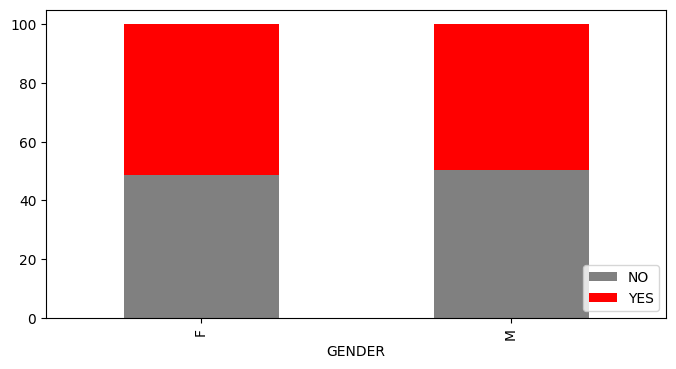

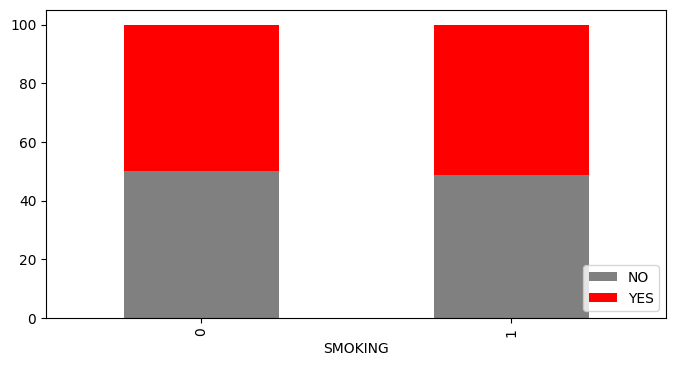

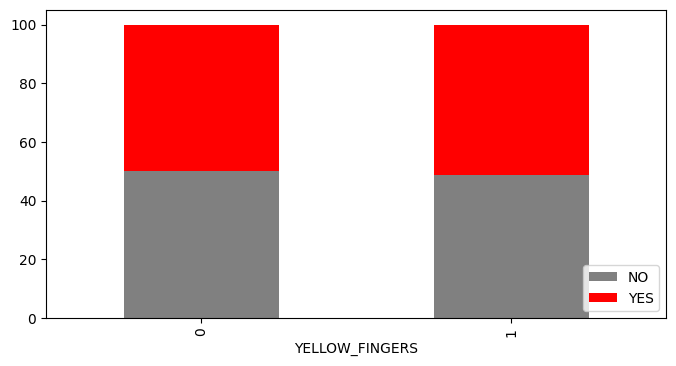

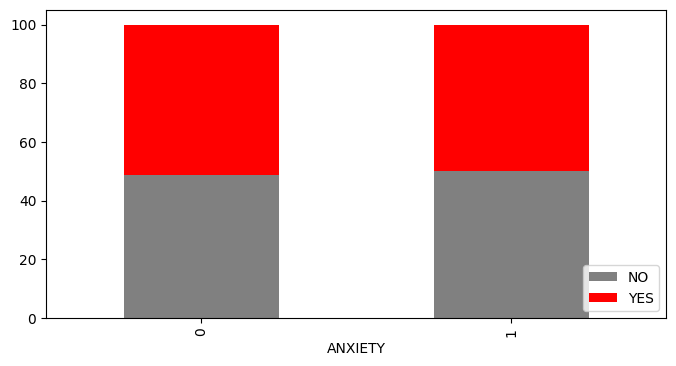

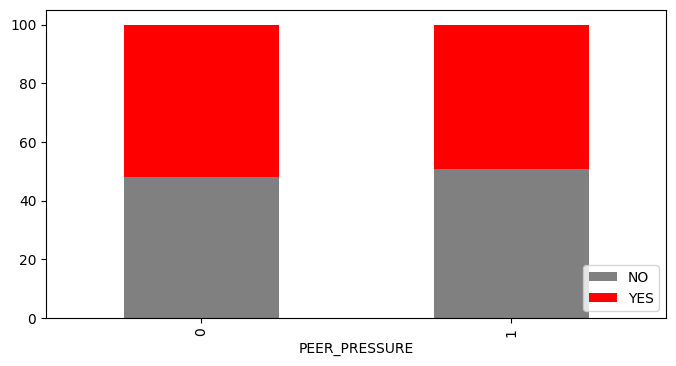

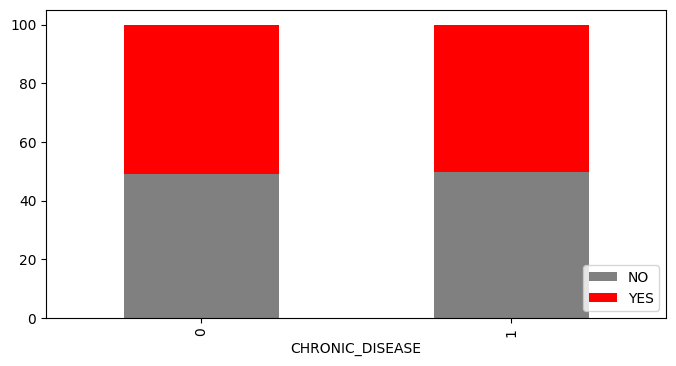

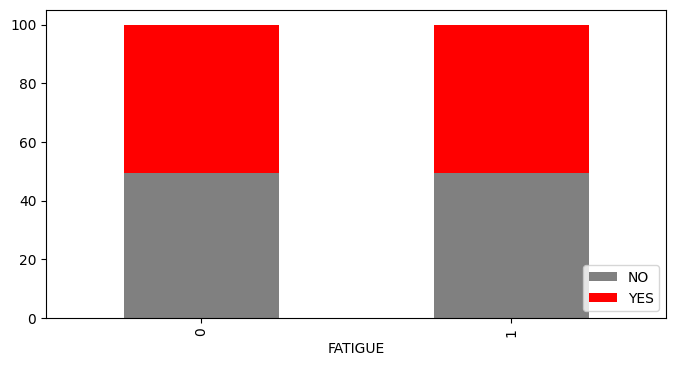

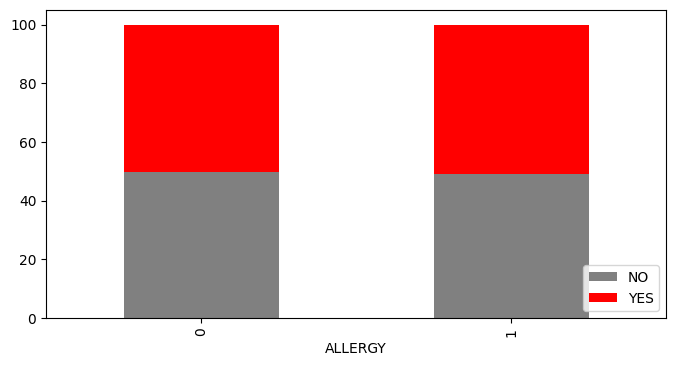

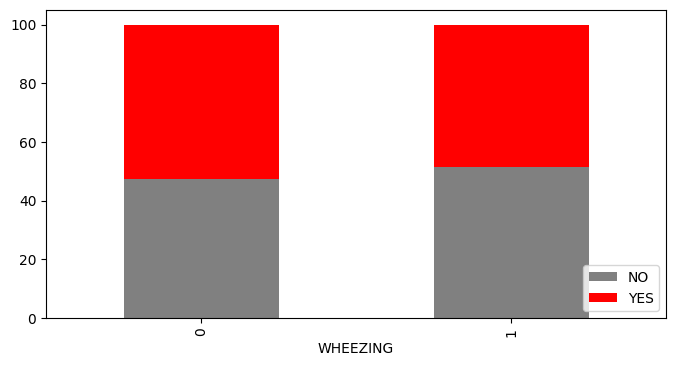

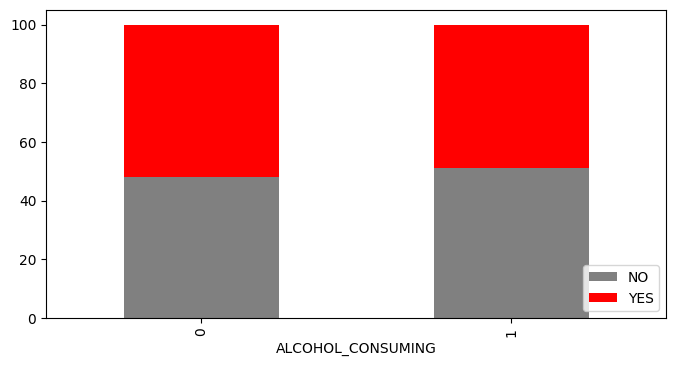

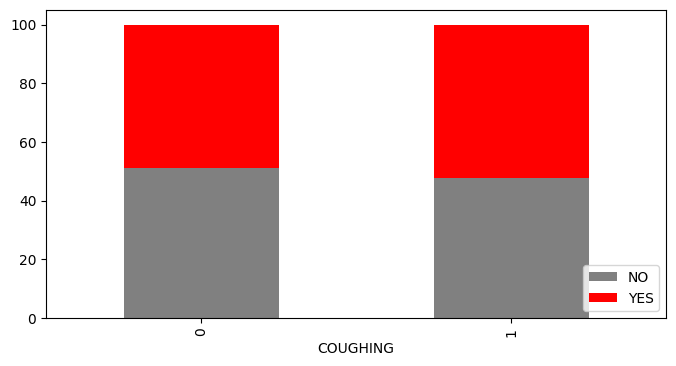

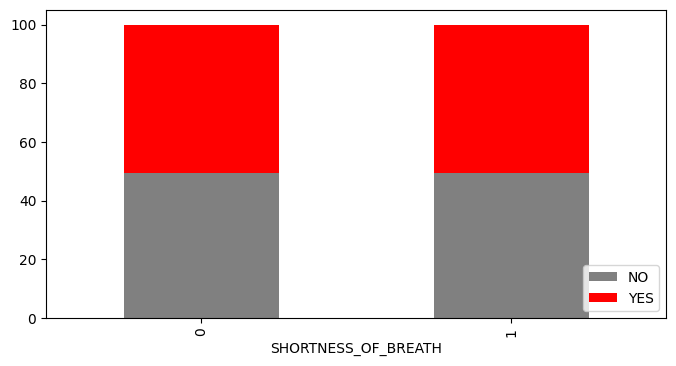

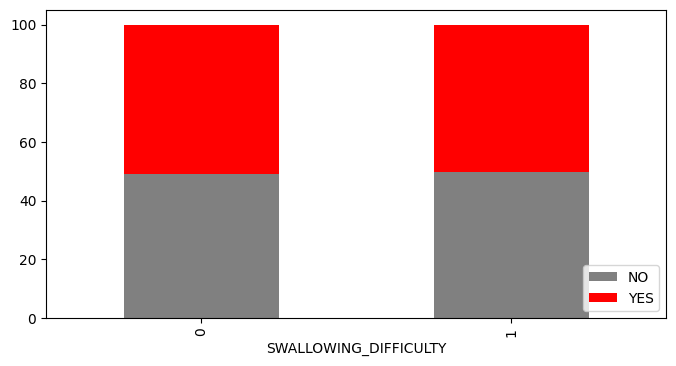

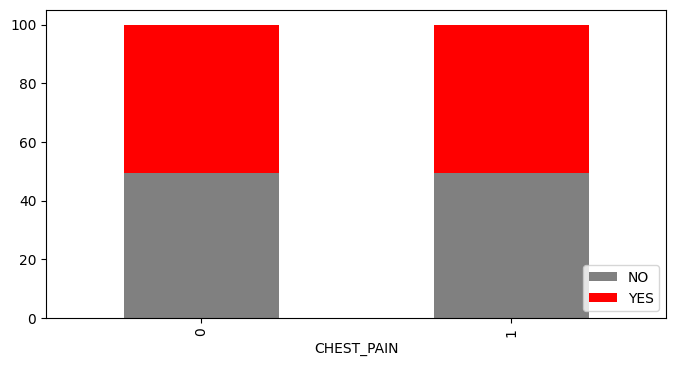

In [ ]:
cols_to_analyze = df.columns
cols_to_analyze = cols_to_analyze.drop(['LUNG_CANCER','AGE'])
for i in cols_to_analyze:
  stack_bar(df,i,'LUNG_CANCER')

<Axes: >

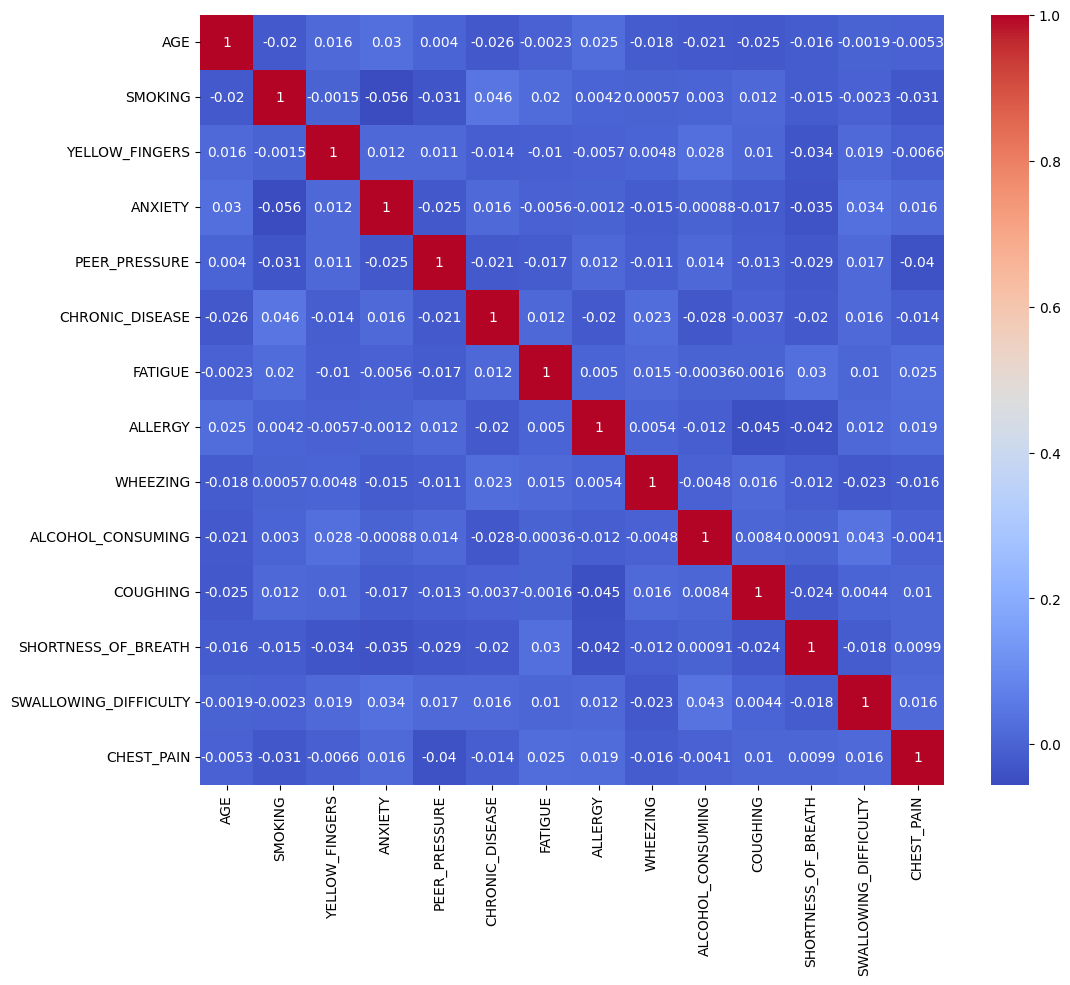

In [ ]:
num_cols = df.select_dtypes(include='int64').columns.tolist()

plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(),annot=True,cmap='coolwarm')

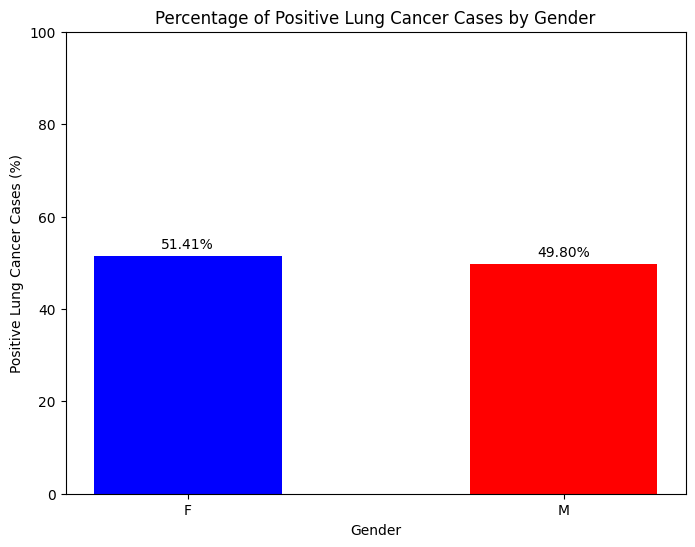

In [ ]:
positive = df[df['LUNG_CANCER'] == 'YES']['GENDER'].value_counts()
total = df['GENDER'].value_counts()
positive_percent = (positive / total) * 100

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(positive_percent.index, positive_percent.values, color=['blue', 'r'], width=0.5)

# Add labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

plt.title('Percentage of Positive Lung Cancer Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Positive Lung Cancer Cases (%)')
plt.ylim(0, 100)  # Set y-axis limits to 0-100%
plt.show()

In [ ]:
df['GENDER'] = df['GENDER'].map({'M':0,'F':1})

In [ ]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES':1,'NO':0})

In [ ]:
Y = df.LUNG_CANCER
X = df.drop('LUNG_CANCER',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [ ]:
x_size = (X_train.shape[0]) / X.shape[0]
print(x_size)
y_size = (y_train.shape[0]) / Y.shape[0]
print(y_size)

0.799866577718479
0.799866577718479


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)

X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)



In [ ]:
X_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
0,1.009217,0.592607,-0.970412,-1.020221,-0.982636,-1.011745,0.987567,1.043480,0.998333,1.009217,1.000834,0.978545,1.021925,1.017671,1.010902
1,1.009217,-0.226730,1.030490,0.980180,-0.982636,-1.011745,0.987567,1.043480,0.998333,1.009217,1.000834,0.978545,-0.978545,1.017671,1.010902
2,-0.990867,1.207110,1.030490,0.980180,1.017671,0.988391,0.987567,-0.958332,0.998333,1.009217,-0.999166,-1.021925,-0.978545,-0.982636,-0.989216
3,1.009217,-1.660571,-0.970412,0.980180,1.017671,0.988391,-1.012590,1.043480,-1.001669,1.009217,-0.999166,-1.021925,1.021925,1.017671,1.010902
4,-0.990867,1.002276,-0.970412,0.980180,-0.982636,0.988391,-1.012590,1.043480,-1.001669,1.009217,1.000834,0.978545,1.021925,-0.982636,1.010902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393,-0.990867,-1.592292,1.030490,0.980180,-0.982636,-1.011745,0.987567,-0.958332,0.998333,-0.990867,-0.999166,0.978545,1.021925,-0.982636,-0.989216
2394,-0.990867,-0.772955,1.030490,-1.020221,-0.982636,0.988391,0.987567,-0.958332,0.998333,-0.990867,-0.999166,-1.021925,1.021925,1.017671,-0.989216
2395,1.009217,0.797442,1.030490,-1.020221,1.017671,-1.011745,-1.012590,1.043480,-1.001669,1.009217,-0.999166,-1.021925,1.021925,1.017671,-0.989216
2396,-0.990867,1.480223,-0.970412,0.980180,-0.982636,0.988391,-1.012590,-0.958332,-1.001669,-0.990867,1.000834,-1.021925,1.021925,1.017671,1.010902


In [ ]:
# Function to calculate the Classification report and confusion Matrix
def conf_matrix(real, predicted):
    print(classification_report(real, predicted))

    cm = confusion_matrix(real, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.ylabel('Real')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1194
           1       1.00      1.00      1.00      1204

    accuracy                           1.00      2398
   macro avg       1.00      1.00      1.00      2398
weighted avg       1.00      1.00      1.00      2398



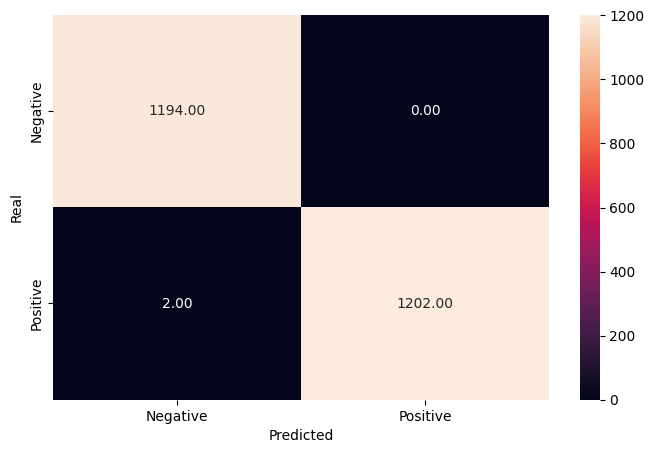

In [ ]:
dt_pred1 = dt.predict(X_train)
conf_matrix(y_train, dt_pred1)

              precision    recall  f1-score   support

           0       0.48      0.49      0.49       287
           1       0.52      0.51      0.52       313

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600



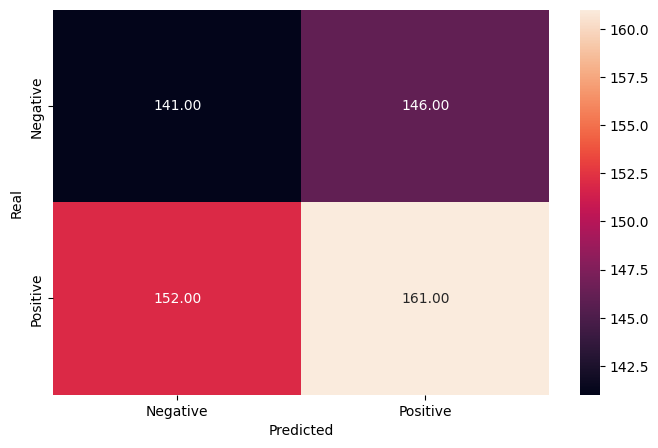

In [ ]:
# Code to check the model efficiency on the test data
dt_evaluation_1 = dt.predict(X_test)
conf_matrix(y_test ,dt_evaluation_1)

In [109]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=7,class_weight = {0: 0.5, 1: 0.5})

# Different parameters for the model
parameters = {
    "max_depth": [8,9,10,11],
    "max_leaf_nodes": np.arange(1,100,10),
    "min_samples_split": np.arange(1,20,1),
    'criterion': ['gini', 'entropy']
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the model to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, max_depth=10,
                       max_leaf_nodes=41, min_samples_split=14, random_state=7)

              precision    recall  f1-score   support

           0       0.60      0.62      0.61      1194
           1       0.61      0.59      0.60      1204

    accuracy                           0.61      2398
   macro avg       0.61      0.61      0.61      2398
weighted avg       0.61      0.61      0.61      2398



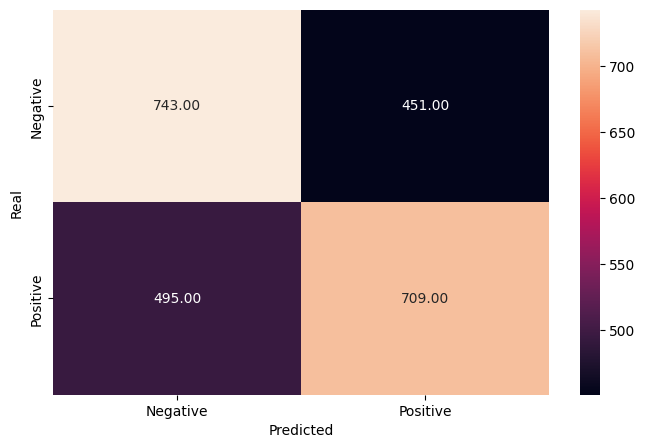

In [110]:
dt_predict_2 = estimator.predict(X_train)
conf_matrix(y_train,dt_predict_2)

              precision    recall  f1-score   support

           0       0.50      0.51      0.51       287
           1       0.54      0.53      0.54       313

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.52       600
weighted avg       0.52      0.52      0.52       600



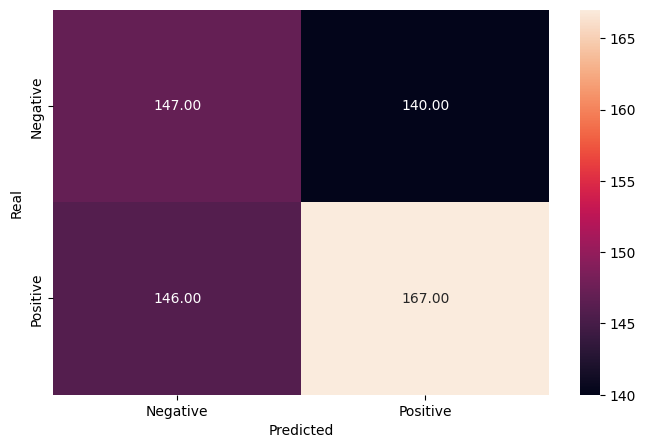

In [111]:
dt_evaluation_2 = estimator.predict(X_test)
conf_matrix(y_test,dt_evaluation_2)